## Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
### extract headers as they contain white spaces
colnames = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, nrows=1)
header = []
for i in range(0,32):
    header.append(colnames.iloc[0, i].strip())

### read data set
cancer = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, names = header, skiprows=1, index_col=False)


In [2]:
### Overview
print(header)
print(cancer.head())

['ID', 'class', 'radiusMean', 'textureMean', 'perimeterMean', 'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'symmetryMean', 'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr', 'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr', 'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr', 'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst', 'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst']
        ID class  radiusMean  textureMean  perimeterMean  areaMean  \
0   868682     B       11.43        15.39          73.06     399.8   
1   881972     M       17.05        19.08         113.40     895.0   
2   901315     B       10.57        20.22          70.15     338.3   
3  9112367     B       13.21        25.25          84.10     537.9   
4  8711202     M       17.68        20.74         117.40     963.7   

   smoothnessM

In [3]:
### check Data Types
cancer.info()
# class should be nominal
cancer["class"] = cancer["class"].astype("category")
### there are no missing values
cancer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
ID                        285 non-null int64
class                     285 non-null object
radiusMean                285 non-null float64
textureMean               285 non-null float64
perimeterMean             285 non-null float64
areaMean                  285 non-null float64
smoothnessMean            285 non-null float64
compactnessMean           285 non-null float64
concavityMean             285 non-null float64
concavePointsMean         285 non-null float64
symmetryMean              285 non-null float64
fractalDimensionMean      285 non-null float64
radiusStdErr              285 non-null float64
textureStdErr             285 non-null float64
perimeterStdErr           285 non-null float64
areaStdErr                285 non-null float64
smoothnessStdErr          285 non-null float64
compactnessStdErr         285 non-null float64
concavityStdErr           285 non-null float64
conca

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
fractalDimensionWorst     0
dtype: int64

In [3]:
cancer.iloc[:,1:].describe()
cancer.shape

(285, 32)

## Statistical Analysis

col_0     count
class          
B      0.663158
M      0.336842


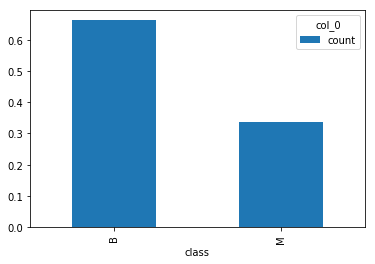

In [4]:
# class distribution
class_table = pd.crosstab(cancer["class"], columns = "count")
class_table = class_table/class_table.sum()
print(class_table)
class_table.plot(kind = "bar")

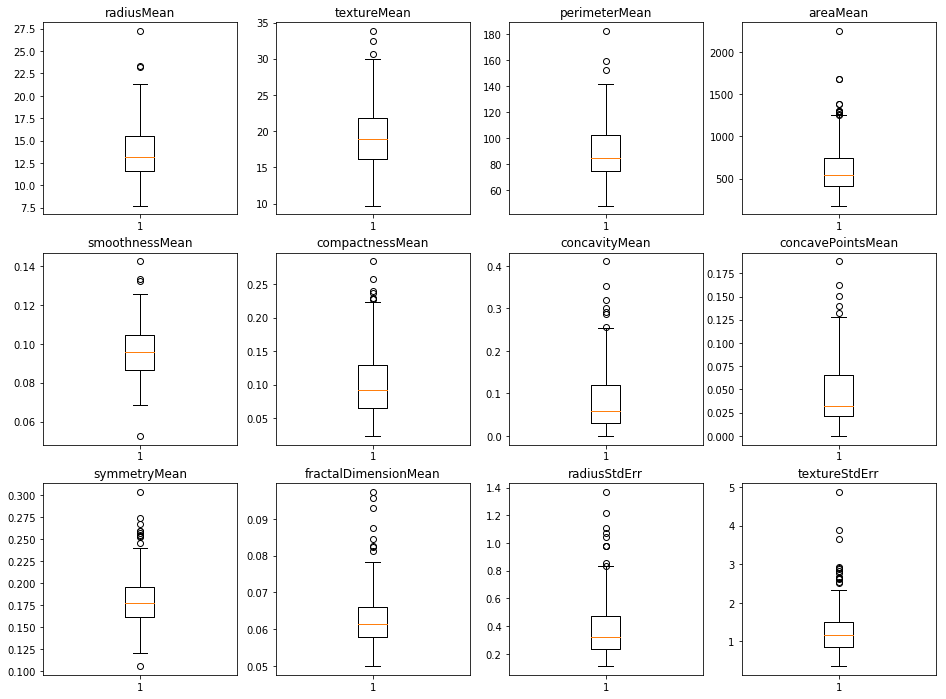

In [8]:
fig, axlist = plt.subplots(3,4,figsize=(16,12))
variable = 2
for row in range(0,3):
    for i in range(0,4):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1
        
### There are some outliers but the distributions seems normal to me. I suggest that we leave it like that or cut
#   extreme outliers like in areaMean to achieve more accuracy for the "average" cases which are more important in ML
#   as special cases are always hard to predict

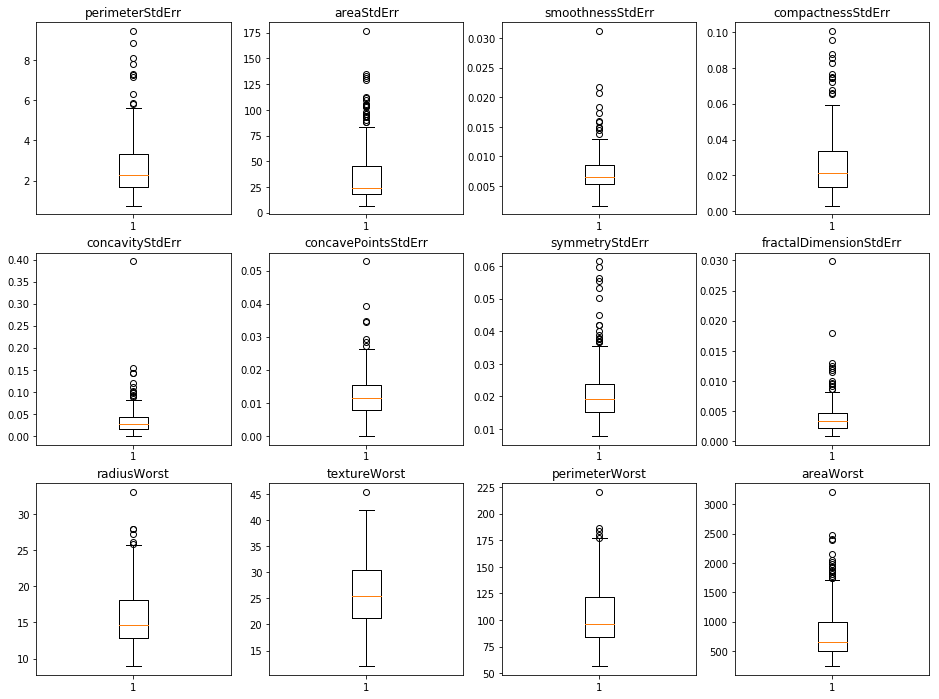

In [9]:
fig, axlist = plt.subplots(3,4,figsize=(16,12))
for row in range(0,3):
    for i in range(0,4):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1
        
### same is here. maybe cut some extreme outliers like concavityStdErr and others.

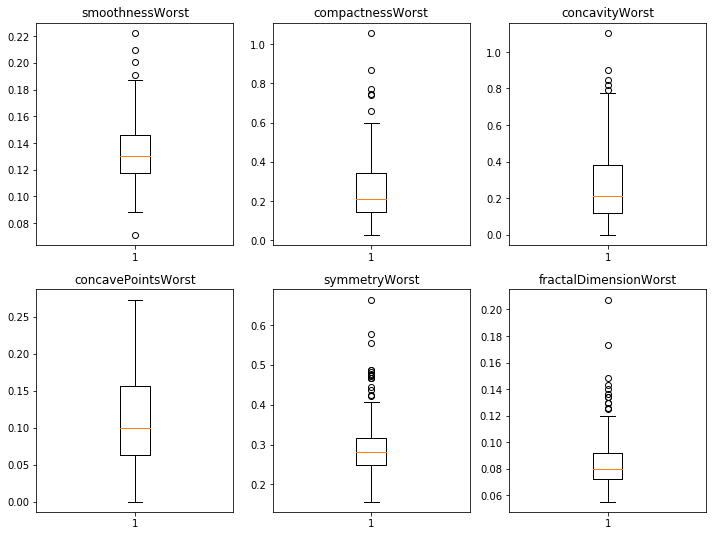

In [10]:
fig, axlist = plt.subplots(2,3,figsize=(12,9))
for row in range(0,2):
    for i in range(0,3):
        axlist[row][i].boxplot(cancer[header[variable]])
        axlist[row][i].set_title(header[variable])
        variable += 1

### same

In [104]:
###
# 285 observations
# 32 columns(index 0 is ID and index 1 is classification var)
# all variable are floats and don't need to be further processed for now
# classification is binary (B, M)

280      869691
281      871149
282    84667401
283      912558
284      917080
Name: ID, dtype: int64

### Data Set Description

The Data Set contains information about different properties of breast cancer and if a recurrence event occured or not. It contains 285 observations on 32 variables, wehereas one is the ID and one is the target variable "class". Therefore the data set consists of 30 features. All features are floating point values and the target variable has two different values, therefore it can be considered as binary classification.  
The target variable is slightly inequally distributed as the proportion for B is about 66%. Generally all features have similar distribution patterns with several outliers to the top. There are only very few values which are extreme outliers beside that there are no peculiarities.

## Experiments

In [4]:
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
### to use recall precision in cross_validate
from sklearn.metrics.scorer import make_scorer


### extract means and stdevs of recall and precision
def get_mean(accumulator):
    rval = []
    for j in range(len(accumulator[0])):
        current = []
        for i in accumulator:
            current.append(i[j])
        rval.append(statistics.mean(current))
    return rval

def get_std(accumulator):
    rval = []
    for j in range(len(accumulator[0])):
        current = []
        for i in accumulator:
            current.append(i[j])
        rval.append(statistics.stdev(current))
    return rval

from sklearn.metrics import recall_score, precision_score





/home/niklas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
Xdata = cancer.iloc[:,2:32]
Ydata = cancer.iloc[:,1]

## kNN

In [6]:
### Function to experiment with kNN
def knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute"):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    number_of_classes = len(Ydata.unique())

    ### list for each target class
    precision_mean = [ [] for i in range(number_of_classes) ]
    precision_std = [ [] for i in range(number_of_classes) ]
    recall_mean = [ [] for i in range(number_of_classes) ]
    recall_std = [ [] for i in range(number_of_classes) ]  
    recall_accumulator = []
    precision_accumulator = []
    ### always specify a list to save results before every call
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}

    for i in range(2,101):
        knn = KNeighborsClassifier(i, weights=weights, algorithm = algorithm)
        recall_accumulator = []
        precision_accumulator = []
        scores = cross_validate(knn, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        
        prec_means = get_mean(precision_accumulator)
        prec_stds = get_std(precision_accumulator)
        rec_means = get_mean(recall_accumulator)
        rec_stds = get_std(recall_accumulator)
        

             
        for i in range(number_of_classes):
            precision_mean[i].append(prec_means[i])
            precision_std.append(prec_stds[i])
            recall_mean[i].append(rec_means[i])
            recall_std[i].append(rec_stds[i])

        
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(accuracy_mean)
    plt.plot(accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    for i in range(number_of_classes):
        plt.plot(precision_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Precision")
    plt.xlabel("k")
    plt.subplot(2,2,3)
    for i in range(number_of_classes):
        plt.plot(recall_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(sorted(Ydata.unique()))
    plt.subplot(2,2,4)
    plt.plot(fit_time)
    plt.plot(score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))
    
    return accuracy_mean

[0.9225095785440613,
 0.9332238642583471,
 0.9193076081007115,
 0.9333561393906221,
 0.9263364349571246,
 0.9332329866812625,
 0.9297847108191934,
 0.9297847108191934,
 0.9227650063856961,
 0.9227650063856961,
 0.9227650063856959,
 0.9227650063856959,
 0.9227650063856959,
 0.9227650063856959,
 0.926213282247765,
 0.9297847108191934,
 0.9226418536763366,
 0.9226418536763366,
 0.9260901295384054,
 0.9260901295384054,
 0.9226418536763366,
 0.9260901295384054,
 0.9226418536763366,
 0.9226418536763366,
 0.9191935778142675,
 0.9260901295384054,
 0.9191935778142675,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9190704251049079,
 0.9226418536763366,
 0.9190704251049079,
 0.9190704251049079,
 0.9190704251049079,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9157453019521986,
 0.9226418536763366,
 0.9260901295384054,
 0.92264185367

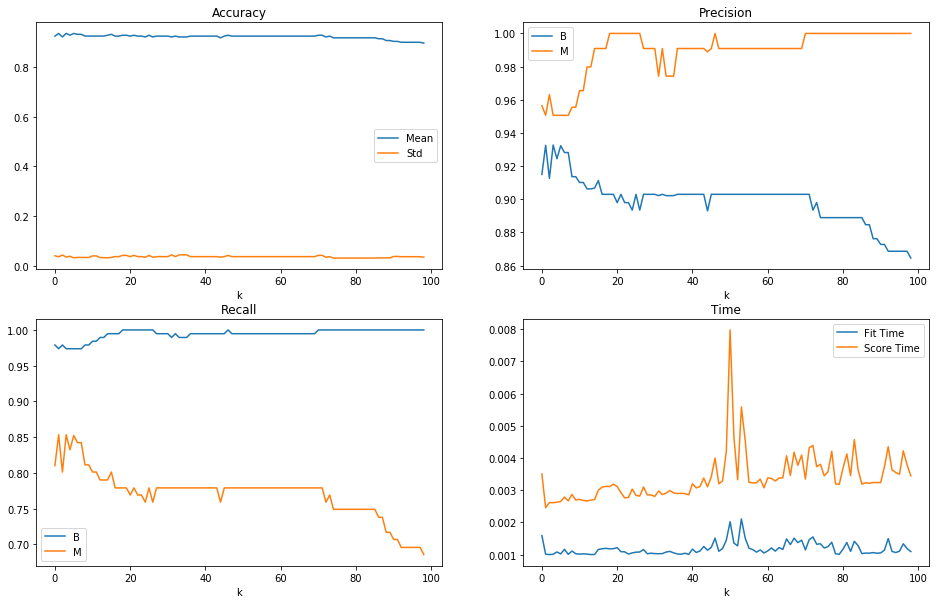

In [17]:
knn_test(Xdata, Ydata, weights = "uniform", algorithm = "brute")

[0.9366812625433315,
 0.9403758438241197,
 0.9438241196861886,
 0.936804415252691,
 0.936804415252691,
 0.94025269111476,
 0.9366812625433314,
 0.9366812625433314,
 0.9297847108191934,
 0.9263364349571246,
 0.9297847108191934,
 0.9193167305236271,
 0.9227650063856959,
 0.9227650063856959,
 0.9263364349571246,
 0.926213282247765,
 0.926213282247765,
 0.9226418536763363,
 0.9226418536763363,
 0.9260901295384054,
 0.9225187009669769,
 0.9226418536763363,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9225187009669769,
 0.9260901295384054,
 0.9225187009669769,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9225187009669769,
 0.9190704251049079,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769

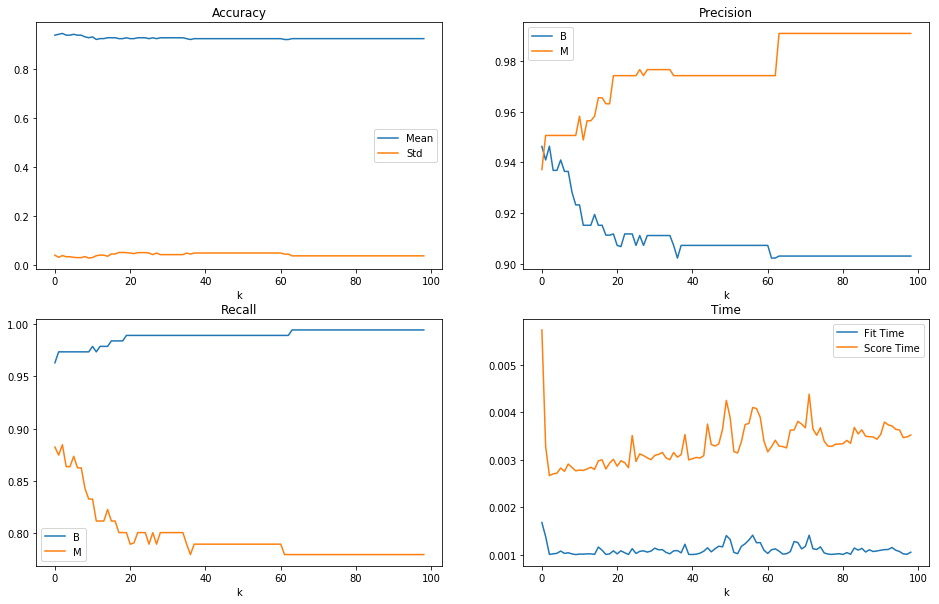

In [18]:
knn_test(Xdata, Ydata, weights="distance", algorithm="brute")

[0.9687192118226602,
 0.9719120598430944,
 0.9757389162561576,
 0.9791871921182265,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9757389162561576,
 0.9757389162561576,
 0.9757389162561576,
 0.9757389162561576,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.9685960591133005,
 0.9685960591133005,
 0.9651477832512315,
 0.972167487684729,
 0.9650246305418719,
 0.972167487684729,
 0.9613209268381683,
 0.964892355409597,
 0.964892355409597,
 0.9684637839810254,
 0.9577494982667398,
 0.9613209268381683,
 0.9543012224046707,
 0.9543012224046707,
 0.950597518700967,
 0.950597518700967,
 0.9471492428388981,
 0.9543012224046707,
 0.950597518700967,
 0.9543012224046707,
 0.950597518700967,
 0.9543012224046707,
 0.9470260901295384,
 0.9471492428388981,
 0.9470260901295384,
 0.9435778142674695,
 0.947

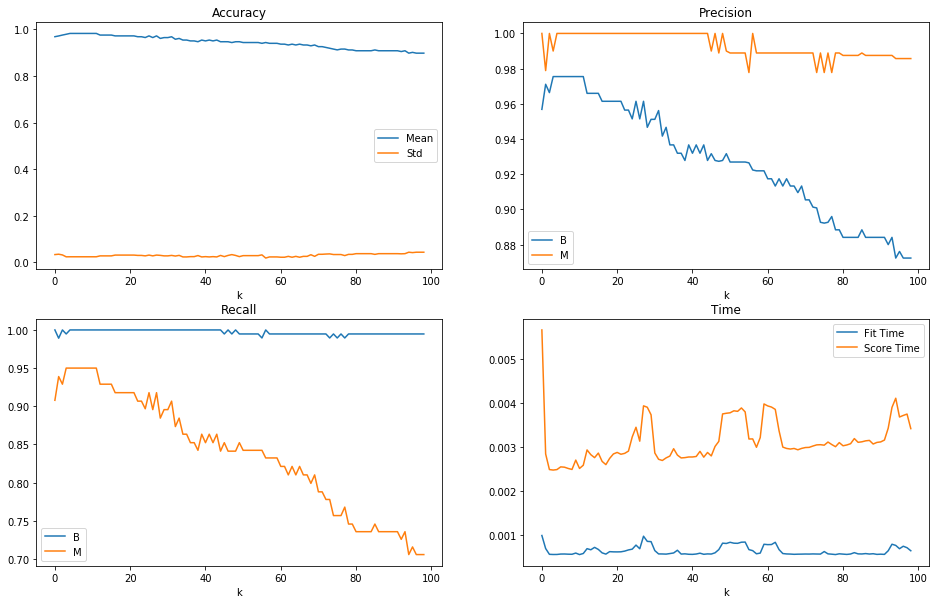

In [19]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="uniform", algorithm="brute")

[0.975615763546798,
 0.9719120598430944,
 0.9719120598430944,
 0.9791871921182265,
 0.9791871921182265,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9862068965517242,
 0.9827586206896551,
 0.9862068965517242,
 0.9827586206896551,
 0.9791871921182265,
 0.9791871921182265,
 0.9791871921182265,
 0.9791871921182265,
 0.9757389162561576,
 0.975615763546798,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.9685960591133005,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.9685960591133005,
 0.972167487684729,
 0.9684637839810254,
 0.9684637839810254,
 0.964892355409597,
 0.964892355409597,
 0.9613209268381683,
 0.964892355409597,
 0.964892355409597,
 0.9613209268381683,
 0.9613209268381683,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9543012224046707,
 0.954301

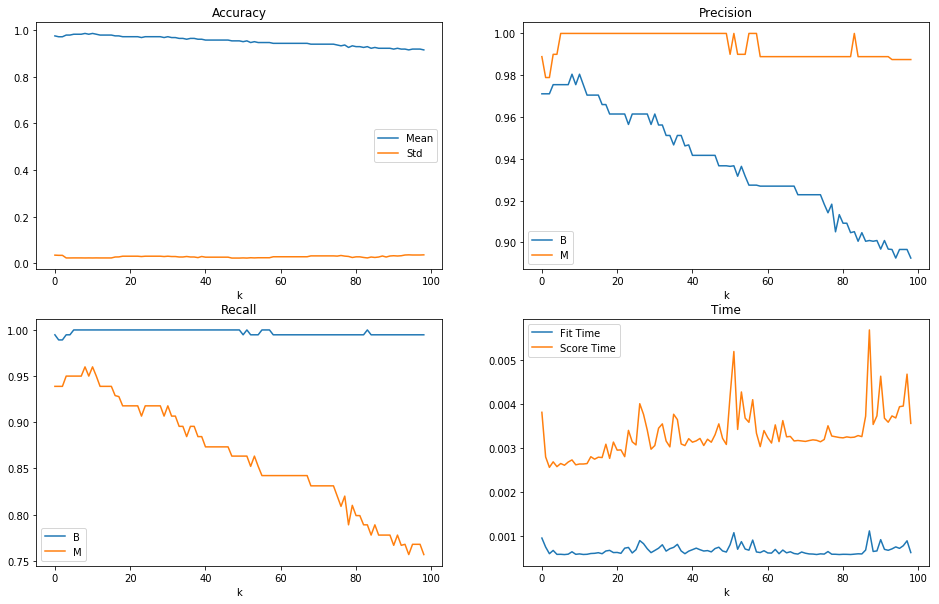

In [21]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="distance", algorithm = "brute")

[0.9225095785440613,
 0.9332238642583471,
 0.9193076081007115,
 0.9333561393906221,
 0.9263364349571246,
 0.9332329866812625,
 0.9297847108191934,
 0.9297847108191934,
 0.9227650063856961,
 0.9227650063856961,
 0.9227650063856959,
 0.9227650063856959,
 0.9227650063856959,
 0.9227650063856959,
 0.926213282247765,
 0.9297847108191934,
 0.9226418536763366,
 0.9226418536763366,
 0.9260901295384054,
 0.9260901295384054,
 0.9226418536763366,
 0.9260901295384054,
 0.9226418536763366,
 0.9226418536763366,
 0.9191935778142675,
 0.9260901295384054,
 0.9191935778142675,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9190704251049079,
 0.9226418536763366,
 0.9190704251049079,
 0.9190704251049079,
 0.9190704251049079,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9226418536763366,
 0.9157453019521986,
 0.9226418536763366,
 0.9260901295384054,
 0.92264185367

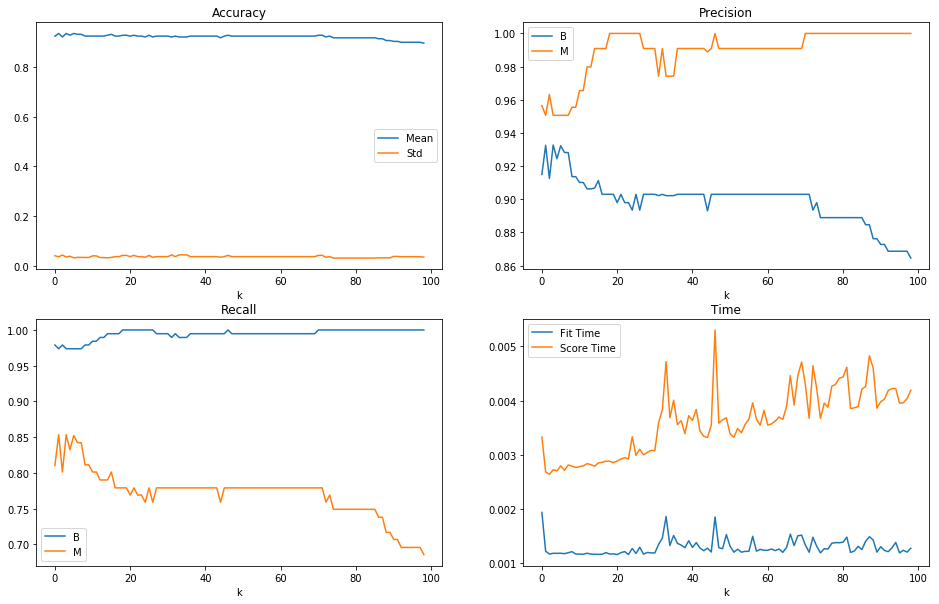

In [22]:
knn_test(Xdata, Ydata, weights="uniform", algorithm="kd_tree")

[0.9366812625433315,
 0.9403758438241197,
 0.9438241196861886,
 0.936804415252691,
 0.936804415252691,
 0.94025269111476,
 0.9366812625433314,
 0.9366812625433314,
 0.9297847108191934,
 0.9263364349571246,
 0.9297847108191934,
 0.9193167305236271,
 0.9227650063856959,
 0.9227650063856959,
 0.9263364349571246,
 0.926213282247765,
 0.926213282247765,
 0.9226418536763363,
 0.9226418536763363,
 0.9260901295384054,
 0.9225187009669769,
 0.9226418536763363,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9225187009669769,
 0.9260901295384054,
 0.9225187009669769,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9260901295384054,
 0.9225187009669769,
 0.9190704251049079,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769,
 0.9225187009669769

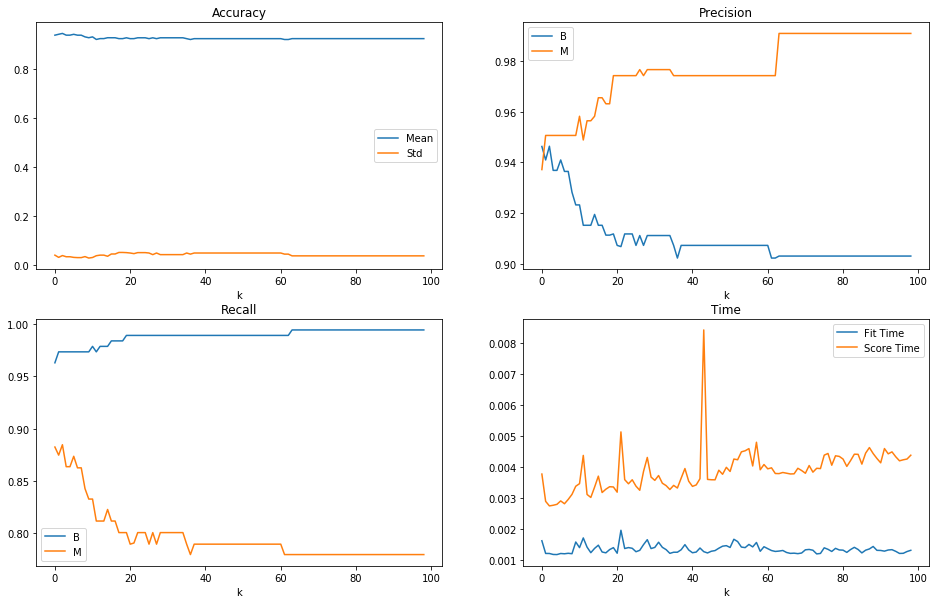

In [23]:
knn_test(Xdata, Ydata, weights="distance", algorithm="kd_tree")

[0.975615763546798,
 0.9719120598430944,
 0.9719120598430944,
 0.9791871921182265,
 0.9791871921182265,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9862068965517242,
 0.9827586206896551,
 0.9862068965517242,
 0.9827586206896551,
 0.9791871921182265,
 0.9791871921182265,
 0.9791871921182265,
 0.9791871921182265,
 0.9757389162561576,
 0.975615763546798,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.9685960591133005,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.9685960591133005,
 0.972167487684729,
 0.9684637839810254,
 0.9684637839810254,
 0.964892355409597,
 0.964892355409597,
 0.9613209268381683,
 0.964892355409597,
 0.964892355409597,
 0.9613209268381683,
 0.9613209268381683,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9577494982667398,
 0.9543012224046707,
 0.954301

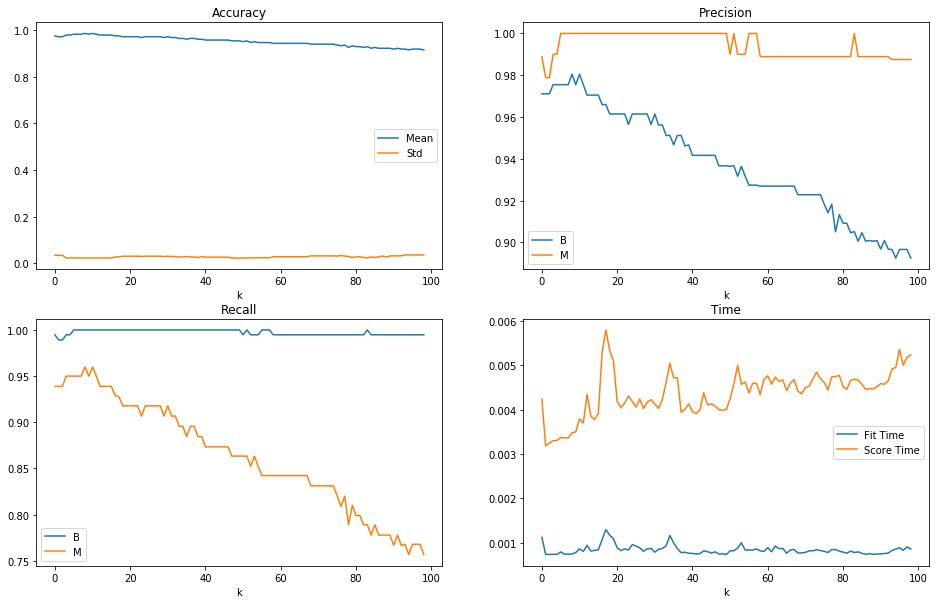

In [24]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="distance", algorithm="kd_tree")

[0.9687192118226602,
 0.9719120598430944,
 0.9757389162561576,
 0.9791871921182265,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9827586206896551,
 0.9757389162561576,
 0.9757389162561576,
 0.9757389162561576,
 0.9757389162561576,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.972167487684729,
 0.9685960591133005,
 0.9685960591133005,
 0.9651477832512315,
 0.972167487684729,
 0.9650246305418719,
 0.972167487684729,
 0.9613209268381683,
 0.964892355409597,
 0.964892355409597,
 0.9684637839810254,
 0.9577494982667398,
 0.9613209268381683,
 0.9543012224046707,
 0.9543012224046707,
 0.950597518700967,
 0.950597518700967,
 0.9471492428388981,
 0.9543012224046707,
 0.950597518700967,
 0.9543012224046707,
 0.950597518700967,
 0.9543012224046707,
 0.9470260901295384,
 0.9471492428388981,
 0.9470260901295384,
 0.9435778142674695,
 0.947

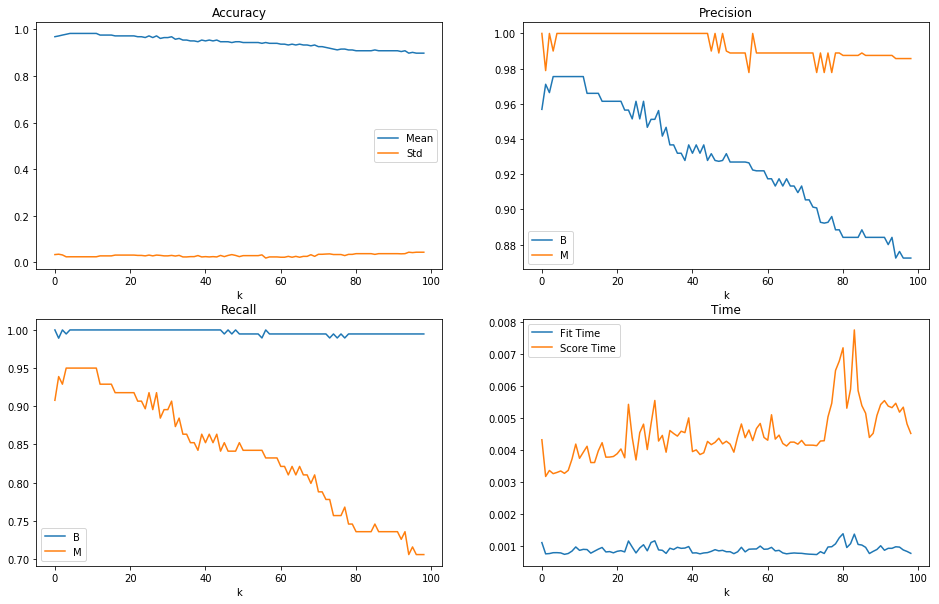

In [25]:
### scale [0, 1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

knn_test(X_minmax, Ydata, weights="uniform", algorithm="kd_tree")

## Naive Bayes

In [7]:
def naive_test(classifier, Xdata, Ydata):
    precision_accumulator = []
    recall_accumulator = []
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}
    
    scores = cross_validate(classifier, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
       
    prec_means = get_mean(precision_accumulator)
    prec_stds = get_std(precision_accumulator)
    rec_means = get_mean(recall_accumulator)
    rec_stds = get_std(recall_accumulator)
    
    rval = {"fit_time":scores["fit_time"].mean(), "score_time":scores["score_time"].mean(), 
            "accuracy":scores["test_accuracy"].mean(), "accuracy_std":scores["test_accuracy"].std(),
            "precision_means":prec_means, "precision_std":prec_stds, "recall_means":rec_means, "recall_std":rec_stds}
    
    for i in rval:
        print(i + ":\n", rval[i])
    
    return rval

In [27]:
rsults = naive_test(GaussianNB(), Xdata, Ydata)

fit_time:
 0.002206563949584961
score_time:
 0.0022313833236694337
accuracy:
 0.9653940886699507
accuracy_std:
 0.030844529709214266
precision_means:
 [0.9746867167919799, 0.9509090909090909]
precision_std:
 [0.0349172371065025, 0.05181729575708861]
recall_means:
 [0.9736842105263157, 0.95]
recall_std:
 [0.027739277720775286, 0.07071067811865474]


In [29]:
rsults = naive_test(MultinomialNB(), Xdata, Ydata)

fit_time:
 0.0021943092346191407
score_time:
 0.0017653942108154298
accuracy:
 0.908593322386426
accuracy_std:
 0.03245878062523942
precision_means:
 [0.9091957165641376, 0.9263455988455989]
precision_std:
 [0.05605158822894236, 0.06680932633764743]
recall_means:
 [0.9631578947368421, 0.7988888888888889]
recall_std:
 [0.035523608300555426, 0.1275978335751003]


In [31]:
rsults = naive_test(BernoulliNB(), Xdata, Ydata)

fit_time:
 0.002293825149536133
score_time:
 0.0024722814559936523
accuracy:
 0.6633415435139574
accuracy_std:
 0.01052289277218425
precision_means:
 [0.6633415435139574, 0.0]
precision_std:
 [0.011092102911275187, 0.0]
recall_means:
 [1.0, 0.0]
recall_std:
 [0.0, 0.0]


/home/niklas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/niklas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/niklas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/niklas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/niklas/anacond

In [8]:
Xdata = cancer.iloc[:,2:31]
Ydata = cancer.iloc[:,1]

Xdata_disc = Xdata

for i in range(0,Xdata.shape[1]):
    quantiles = Xdata.iloc[:,i].quantile([0,0.2,0.4,0.6,0.8,1])
    Xdata_disc.iloc[:,i] = pd.cut(Xdata.iloc[:,i], quantiles, include_lowest=True)

for i in range(0,Xdata.shape[1]):
    lable_encoder = LabelEncoder()
    Xdata_disc.iloc[:,i] = lable_encoder.fit_transform(Xdata_disc.iloc[:,i])    
    

In [35]:
results = naive_test(GaussianNB(), Xdata_disc, Ydata)

fit_time:
 0.0018120288848876953
score_time:
 0.0018350839614868163
accuracy:
 0.9408775770844736
accuracy_std:
 0.053311523811705
precision_means:
 [0.9644736842105263, 0.9125396825396825]
precision_std:
 [0.04763165972013443, 0.10661460999829132]
recall_means:
 [0.9473684210526315, 0.9277777777777778]
recall_std:
 [0.07017543859649122, 0.09576061832479925]


In [33]:
results = naive_test(MultinomialNB(), Xdata_disc, Ydata)

fit_time:
 0.0024332046508789063
score_time:
 0.0018783092498779296
accuracy:
 0.7471127531472359
accuracy_std:
 0.08248270633454509
precision_means:
 [0.9028785907075381, 0.5986752136752137]
precision_std:
 [0.09495570652971334, 0.10842434238119816]
recall_means:
 [0.7043859649122807, 0.8311111111111111]
recall_std:
 [0.11841563773628215, 0.1720369373679096]


In [36]:
results = naive_test(BernoulliNB(), Xdata_disc, Ydata)

fit_time:
 0.0028484821319580077
score_time:
 0.0022116899490356445
accuracy:
 0.7608967341725962
accuracy_std:
 0.05946583975466134
precision_means:
 [0.9699404761904762, 0.594446381791583]
precision_std:
 [0.03924485810433166, 0.07116998822372991]
recall_means:
 [0.6611111111111111, 0.9577777777777777]
recall_std:
 [0.08772417140459923, 0.0546343375246986]


## Random Forest

In [9]:
def test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1):
    accuracy_mean = []
    accuracy_std = []
    fit_time = []
    score_time = []
    number_of_classes = len(Ydata.unique())

    ### list for each target class
    precision_mean = [ [] for i in range(number_of_classes) ]
    precision_std = [ [] for i in range(number_of_classes) ]
    recall_mean = [ [] for i in range(number_of_classes) ]
    recall_std = [ [] for i in range(number_of_classes) ]  
    recall_accumulator = []
    precision_accumulator = []
    ### always specify a list to save results before every call
    def my_precision(y_true, y_pred, **kwargs):
        precisions = precision_score(y_true, y_pred, **kwargs)
        nonlocal precision_accumulator
        precision_accumulator.append(precisions)
        return precisions.mean()

    ### always specify a list to save results before every call
    def my_recall(y_true, y_pred, **kwargs):
        recalls = recall_score(y_true, y_pred, **kwargs)
        nonlocal recall_accumulator
        recall_accumulator.append(recalls)
        return recalls.mean()
    scoring = {"accuracy":"accuracy", "precision":make_scorer(my_precision, average=None), "recall":make_scorer(my_recall, average=None)}
 
    xaxis = []
    
    for i in range(10, 201, 10):
        xaxis.append(i)
    
    for i in range(10, 201, 10):
        rfc = RandomForestClassifier(n_estimators=i, criterion=criterion, min_samples_split=min_samples_split)
        scores = cross_validate(rfc, Xdata, Ydata, cv=10, scoring=scoring, return_train_score=False)
    
        accuracy_mean.append(scores["test_accuracy"].mean())
        accuracy_std.append(scores["test_accuracy"].std())
        fit_time.append(scores["fit_time"].mean())
        score_time.append(scores["score_time"].mean())
        
        prec_means = get_mean(precision_accumulator)
        prec_stds = get_std(precision_accumulator)
        rec_means = get_mean(recall_accumulator)
        rec_stds = get_std(recall_accumulator)
        

             
        for i in range(number_of_classes):
            precision_mean[i].append(prec_means[i])
            precision_std.append(prec_stds[i])
            recall_mean[i].append(rec_means[i])
            recall_std[i].append(rec_stds[i])

    
    #Plot
    plt.figure(figsize=(16, 10))
    plt.subplot(2,2,1)
    plt.plot(xaxis, accuracy_mean)
    plt.plot(xaxis, accuracy_std)
    plt.title("Accuracy")
    plt.xlabel("k")
    plt.legend(("Mean", "Std"))
    plt.subplot(2,2,2)
    for i in range(number_of_classes):
        plt.plot(xaxis, precision_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Precision")
    plt.xlabel("k")
    plt.subplot(2,2,3)
    for i in range(number_of_classes):
        plt.plot(xaxis, recall_mean[i])
    plt.legend(sorted(Ydata.unique()))
    plt.title("Recall")
    plt.xlabel("k")
    plt.legend(sorted(Ydata.unique()))
    plt.subplot(2,2,4)
    plt.plot(xaxis, fit_time)
    plt.plot(xaxis, score_time)
    plt.title("Time")
    plt.xlabel("k")
    plt.legend(("Fit Time", "Score Time"))
    
    return accuracy_mean

[0.9688423645320196,
 0.9722906403940886,
 0.9791871921182265,
 0.9791871921182265,
 0.9757389162561576,
 0.9688423645320196,
 0.9722906403940886,
 0.9722906403940886,
 0.9722906403940886,
 0.9757389162561576,
 0.9722906403940886,
 0.9757389162561576,
 0.9722906403940886,
 0.9791871921182265,
 0.9722906403940886,
 0.9757389162561576,
 0.9757389162561576,
 0.9791871921182265,
 0.9754834884145229,
 0.9757389162561576]

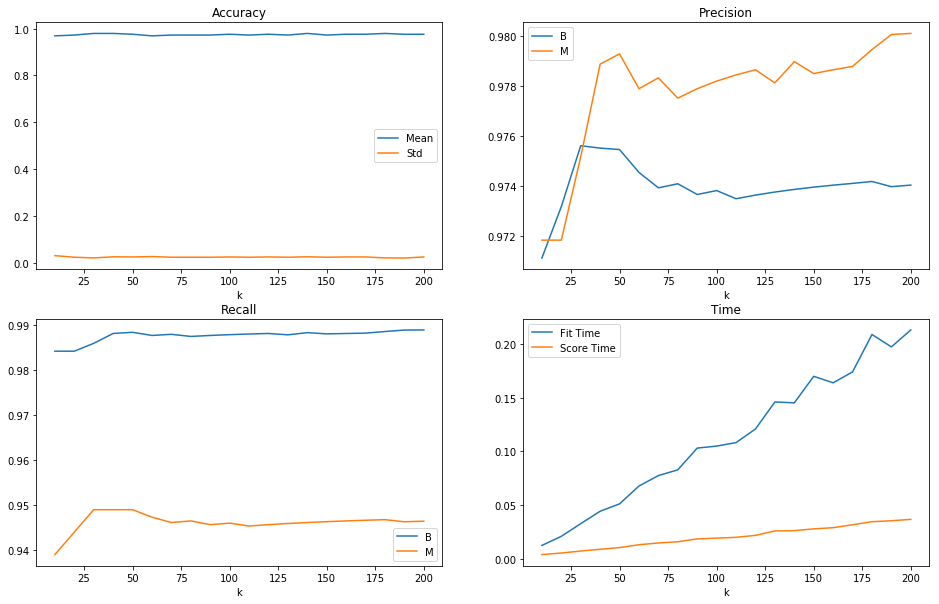

In [44]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 2, min_samples_leaf = 1)

[0.961690384966247,
 0.9757389162561576,
 0.9722906403940886,
 0.9651386608283159,
 0.9757389162561576,
 0.9791871921182265,
 0.9791871921182265,
 0.9722906403940886,
 0.9791871921182265,
 0.9722906403940886,
 0.9688423645320196,
 0.9791871921182265,
 0.9688423645320196,
 0.9722906403940886,
 0.968586936690385,
 0.968586936690385,
 0.9688423645320196,
 0.9722906403940886,
 0.9722906403940886,
 0.9722906403940886]

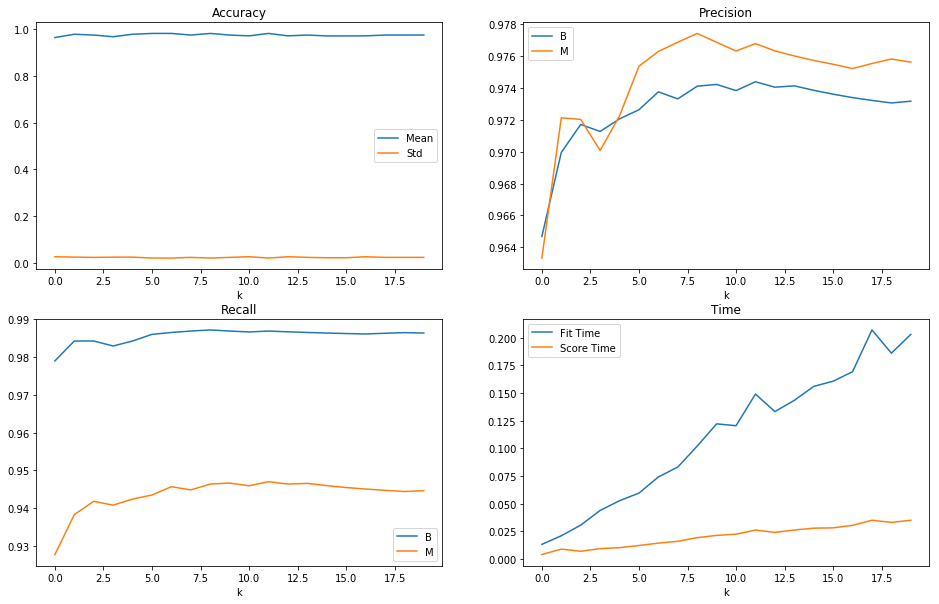

In [42]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 5, min_samples_leaf = 1)

[0.9688423645320196,
 0.968586936690385,
 0.9757389162561576,
 0.9757389162561576,
 0.9684637839810254,
 0.9688423645320196,
 0.9722906403940886,
 0.9722906403940886,
 0.9651386608283159,
 0.9688423645320196,
 0.9651386608283159,
 0.961690384966247,
 0.968586936690385,
 0.9722906403940886,
 0.9651386608283159,
 0.9688423645320196,
 0.9722906403940886,
 0.9722906403940886,
 0.9651386608283159,
 0.9722906403940886]

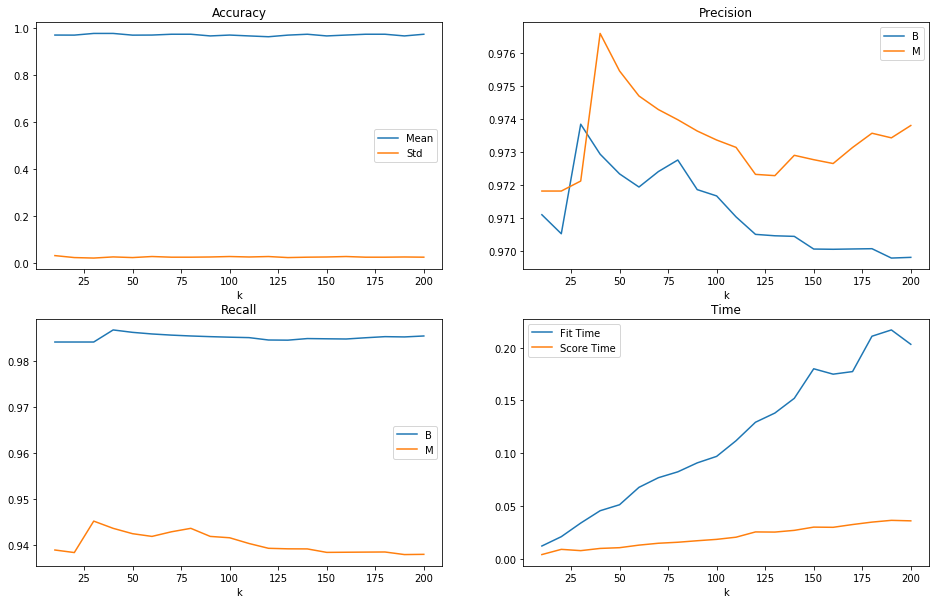

In [45]:
test_rfc(Xdata, Ydata, criterion = "gini", min_samples_split = 10, min_samples_leaf = 1)

[0.9683315088487502,
 0.9720352125524541,
 0.9826354679802956,
 0.9826354679802956,
 0.9791871921182265,
 0.968586936690385,
 0.9791871921182265,
 0.9754834884145229,
 0.9791871921182265,
 0.9791871921182265,
 0.9722906403940886,
 0.9722906403940886,
 0.9826354679802956,
 0.9757389162561576,
 0.9720352125524541,
 0.9826354679802956,
 0.9826354679802956,
 0.9757389162561576,
 0.9757389162561576,
 0.9757389162561576]

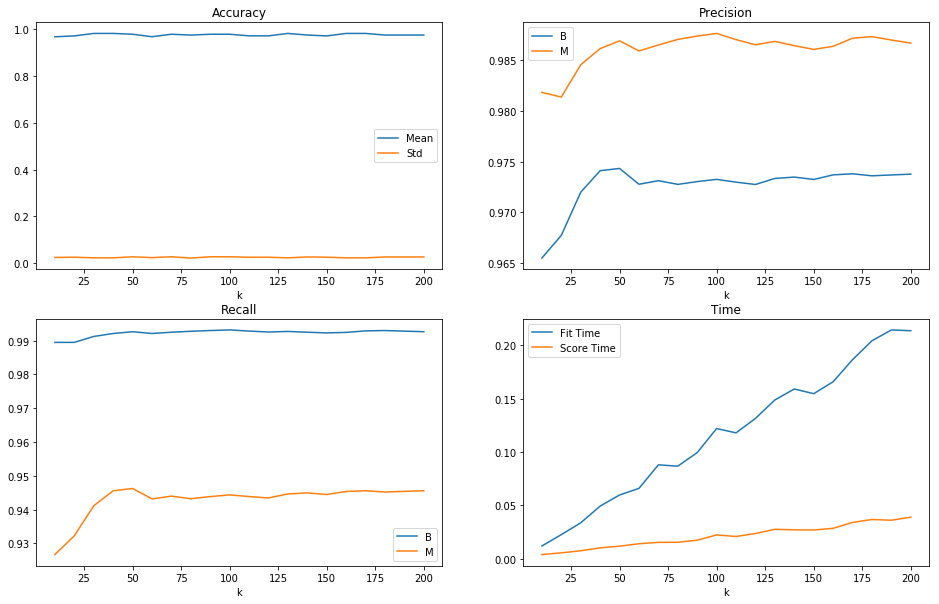

In [46]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 2, min_samples_leaf = 1)

[0.9615672322568874,
 0.9720352125524541,
 0.9720352125524541,
 0.9757389162561576,
 0.9754834884145229,
 0.9722906403940886,
 0.9757389162561576,
 0.9722906403940886,
 0.9757389162561576,
 0.9722906403940886,
 0.9754834884145229,
 0.9722906403940886,
 0.9757389162561576,
 0.9791871921182265,
 0.9757389162561576,
 0.9791871921182265,
 0.9720352125524541,
 0.9757389162561576,
 0.9791871921182265,
 0.968586936690385]

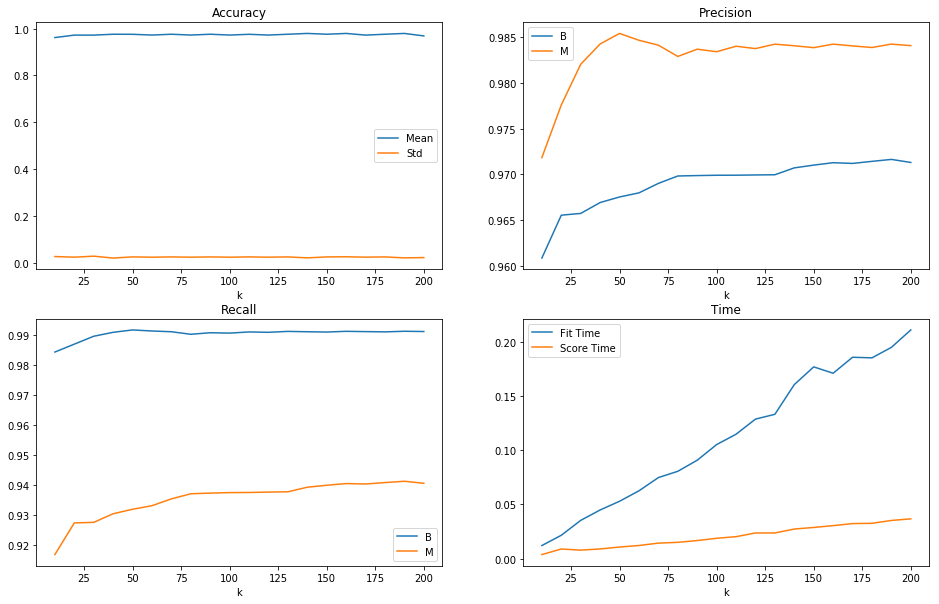

In [47]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 5, min_samples_leaf = 1)

[0.9650155081189563,
 0.972167487684729,
 0.9688423645320196,
 0.9722906403940886,
 0.9688423645320196,
 0.9651386608283159,
 0.968586936690385,
 0.968586936690385,
 0.9651386608283159,
 0.9722906403940886,
 0.9722906403940886,
 0.968586936690385,
 0.9720352125524541,
 0.9688423645320196,
 0.9757389162561576,
 0.968586936690385,
 0.968586936690385,
 0.968586936690385,
 0.9722906403940886,
 0.968586936690385]

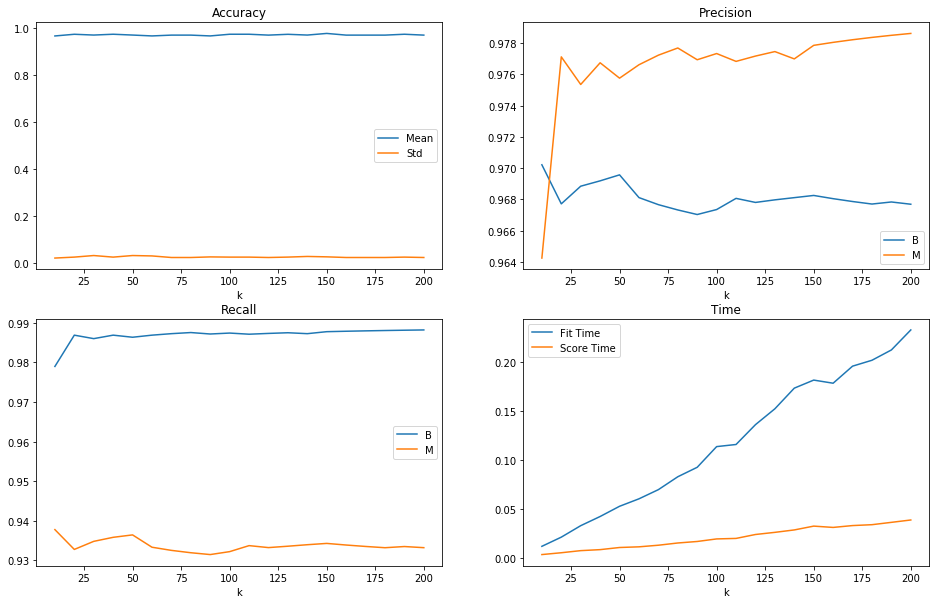

In [48]:
test_rfc(Xdata, Ydata, criterion = "entropy", min_samples_split = 10, min_samples_leaf = 1)

[0.968586936690385,
 0.9791871921182265,
 0.9789317642765919,
 0.9826354679802956,
 0.9791871921182265,
 0.9791871921182265,
 0.9722906403940886,
 0.9791871921182265,
 0.9826354679802956,
 0.9826354679802956,
 0.9720352125524541,
 0.9791871921182265,
 0.9791871921182265,
 0.9757389162561576,
 0.9791871921182265,
 0.9791871921182265,
 0.9757389162561576,
 0.9791871921182265,
 0.968586936690385,
 0.9757389162561576]

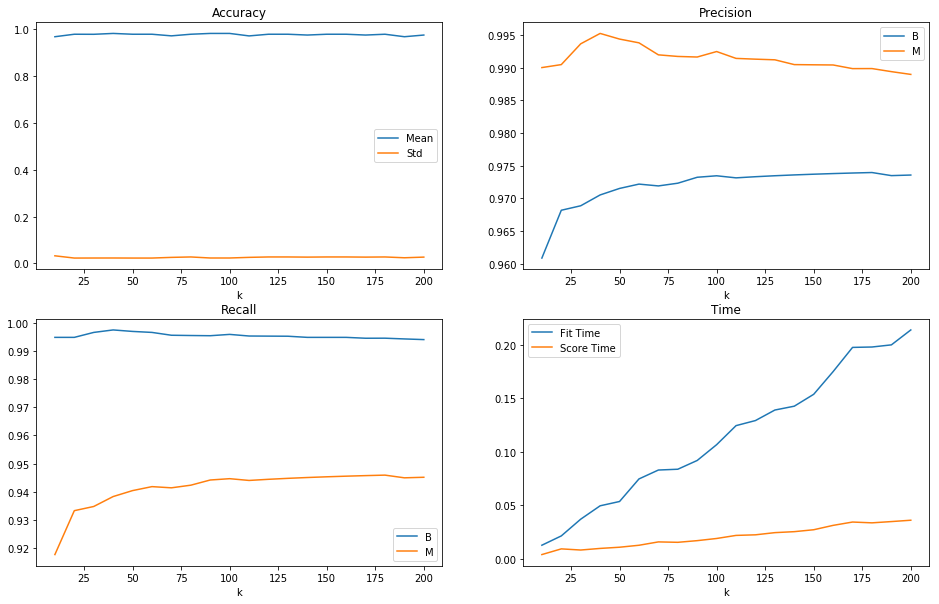

In [49]:
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)


test_rfc(X_minmax, Ydata, criterion = "entropy", min_samples_split = 2, min_samples_leaf = 1)

This is my model suggestion. It is the first upload on kaggle

In [52]:
####test data
### extract headers as they contain white spaces
colnames = pd.read_csv("data/breast-cancer-diagnostic.shuf.tes.csv", header = None, nrows=1)
header = []
for i in range(0,31):
    header.append(colnames.iloc[0, i].strip())

### read data set
test = pd.read_csv("data/breast-cancer-diagnostic.shuf.tes.csv", header = None, names = header, index_col=False, skiprows=1)

test.head()


min_max_scaler = MinMaxScaler()
X_test_minmax = min_max_scaler.fit_transform(test.iloc[:,1:])


In [53]:
def kaggle_prediction(classifier, Xdata, Ydata, X_test, ID, file):
    model = classifier.fit(Xdata, Ydata)
    prediction = model.predict(X_test)
    my_solution = pd.concat([ID, pd.Series(prediction)], axis = 1)
    my_solution.columns = ["ID", "class"]
    my_solution.to_csv(file, index=False)
    print("Prediction Data Set saved in " + file + " in current working directory.")
    return my_solution

In [54]:
### Our Model
Xdata = cancer.iloc[:,2:32]
Ydata = cancer.iloc[:,1]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(Xdata)

classifier = KNeighborsClassifier(9, weights="distance", algorithm="brute")

prediction_knn = kaggle_prediction(classifier, X_minmax, Ydata, X_test_minmax, test.ID, "group31_knn.csv")

Prediction Data Set saved in group31_knn.csv in current working directory.


In [55]:
prediction_gnb = kaggle_prediction(GaussianNB(), Xdata, Ydata, test.iloc[:,1:], test.ID, "group31_gnb.csv")

sum(prediction_gnb.iloc[:,1] == prediction_knn.iloc[:,1])/prediction_gnb.shape[0]


Prediction Data Set saved in group31_gnb.csv in current working directory.


0.9577464788732394

In [56]:
classifier = RandomForestClassifier(n_estimators=15, criterion="entropy")

prediction_rfc = kaggle_prediction(classifier, Xdata, Ydata, test.iloc[:,1:], test.ID, "group31_rfc.csv")

sum(prediction_knn.iloc[:,1] == prediction_rfc.iloc[:,1])/prediction_rfc.shape[0]

Prediction Data Set saved in group31_rfc.csv in current working directory.


0.954225352112676

In [59]:
classifier = RandomForestClassifier(n_estimators=200, criterion="entropy")

prediction_rfc_200 = kaggle_prediction(classifier, Xdata, Ydata, test.iloc[:,1:], test.ID, "group31_rfc_200.csv")

sum(prediction_rfc.iloc[:,1] == prediction_rfc_200.iloc[:,1])/prediction_rfc.shape[0]

Prediction Data Set saved in group31_rfc_200.csv in current working directory.


0.9753521126760564

Software:  
Python 3.7  
Sklearn 0.19.2  
Pandas 0.23.4  
OS:  
Ubuntu 18.04  
Algorithm:  
GaussianNB  
 
No preprocessing

In [100]:
import sklearn
import pandas
import sys
print(sklearn.__version__)
print(pandas.__version__)
print(sys.version)

0.19.2
0.23.4
3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0]


#### Try significance testing